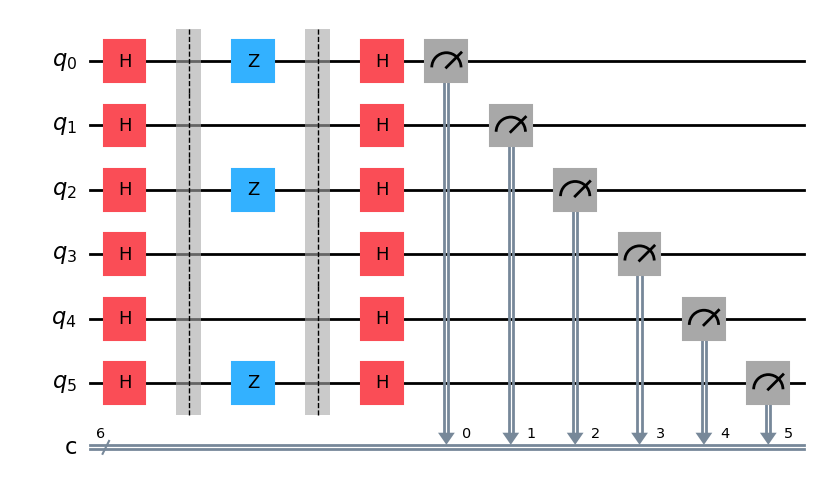

In [ ]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

'''
Bernstein-Vaziraniアルゴリズムの目的は、秘密のビット列 𝑠（これをオラクルとして設定）を効率的に見つけ出すことです。
このアルゴリズムのポイント：
- 古典的には n 回のクエリが必要な問題を、量子アルゴリズムではたった 1 回の回路実行で解決します。
- アダマールゲートと干渉を利用して、秘密のビット列 s を効率的に抽出する仕組みです。
- 量子コンピュータの強力さを示す基本的な例として広く知られています。
'''


# 秘密のビット列 𝑠（オラクル）を設定
a = '100101'

# オラクルを用意
def oracle(qc, a):
    for i, s in enumerate(reversed(a)):
        if s == '1':
            # Z ゲート適用 位相を反転させる量子ゲートで、量子状態に秘密のビット列の情報を埋め込むために使用
            qc.z(i)

'''
補足:
Zゲートは量子ビットの ∣1⟩成分の位相を反転させます。
|+⟩ = (1/√2) * (|0⟩ + |1⟩)
をZ ゲートで移送反転すると、
Z|+⟩ = |-⟩ = (1/√2) * (|0⟩ - |1⟩)
となります。
上記では、𝑎_n=1の時、Z ゲートを適用し、後の操作でアダマール変換した際に干渉（プラスマイナス相殺）を起こすようにします。
ビット列𝑎を逆順に扱う理由は、Qiskitでは量子ビットの順序が「下から上」になっているためです。
'''

# 量子回路の生成
n = len(a)
qc = QuantumCircuit(n, n)
# 初期状態では、全て|0⟩です。

# アダマールゲートをすべての量子ビットに適用
for i in range(n):
    qc.h(i) 
# 量子ビットを 重ね合わせ状態 にするため
# この操作により、|+⟩ = (1/√2) * (|0⟩ + |1⟩) を得ます。
    
qc.barrier()

# オラクルの適用
oracle(qc, a)

qc.barrier()

# 再度アダマールゲートをすべての量子ビットに適用
for i in range(n):
    qc.h(i) 
'''
補足:
再度アダマールゲートを適用することにより、位相に符号化された情報が基底状態に変換されます（戻ります）。
秘密のビット列 s のエンコード情報をもとに、重ね合わせが干渉を起こし、
測定時に s の情報を取り出せるようになります。
'''


# 各量子ビットを測定
for i in range(n):
    qc.measure(i, i)
    
qc.draw(output='mpl')



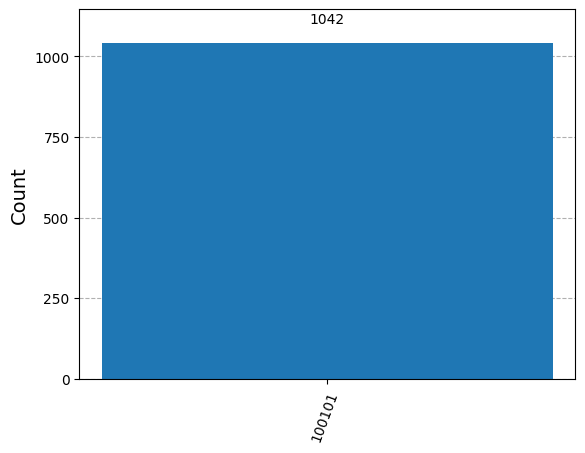

In [4]:

# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1042).result()

# 結果を取得して表示
answer = result.get_counts()
plot_histogram(answer)